# Clean and Analyse Employee Exit Surveys

*In this project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).*

In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

They want us to combine the results for both surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers. In the following steps, we'll aim to do most of the data cleaning and get started analyzing the first question.

Below is a preview of a couple columns we'll work with from the **`dete_survey.csv`**:

- **`ID`**: An id used to identify the participant of the survey
- **`SeparationType`**: The reason why the person's employment ended
- **`Cease Date`**: The year or month the person's employment ended
- **`DETE Start Date`**: The year the person began employment with the DETE


Below is a preview of a couple columns we'll work with from the **`tafe_survey.csv`**:

- **`Record ID`**: An id used to identify the participant of the survey
- **`Reason for ceasing employment`**: The reason why the person's employment ended
- **`LengthofServiceOverall. Overall Length of Service at Institute (in years)`**: The length of the person's employment (in years)

## Opening and discovering the dataset

***

In [1]:
import numpy as np
import pandas as pd

dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

# Let's deep into the first survey
print(dete_survey.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [2]:
print(dete_survey.head(3))

   ID                    SeparationType Cease Date DETE Start Date  \
0   1             Ill Health Retirement    08/2012            1984   
1   2  Voluntary Early Retirement (VER)    08/2012      Not Stated   
2   3  Voluntary Early Retirement (VER)    05/2012            2011   

  Role Start Date         Position Classification          Region  \
0            2004   Public Servant        A01-A04  Central Office   
1      Not Stated   Public Servant        AO5-AO7  Central Office   
2            2011  Schools Officer            NaN  Central Office   

                       Business Unit    Employment Status  ...   \
0  Corporate Strategy and Peformance  Permanent Full-time  ...    
1  Corporate Strategy and Peformance  Permanent Full-time  ...    
2               Education Queensland  Permanent Full-time  ...    

   Kept informed  Wellness programs  Health & Safety  Gender          Age  \
0              N                  N                N    Male        56-60   
1              N   

In [3]:
# Let's deep into the second survey
print(tafe_survey.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [4]:
print(tafe_survey.head(3))

      Record ID                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   

                   WorkArea  CESSATION YEAR Reason for ceasing employment  \
0  Non-Delivery (corporate)          2010.0              Contract Expired   
1  Non-Delivery (corporate)          2010.0                    Retirement   
2       Delivery (teaching)          2010.0                    Retirement   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                  -   
2                                                  -   

  Contributing Factors. Career Move - Private Sector   \
0                                                NaN    
1                                                  -    
2                                                  -    

  Co

In [5]:
tafe_survey["Main Factor. Which of these was the main factor for leaving?"].value_counts()

Dissatisfaction with %[Institute]Q25LBL%    23
Job Dissatisfaction                         22
Other                                       18
Career Move - Private Sector                16
Interpersonal Conflict                       9
Career Move - Public Sector                  8
Maternity/Family                             6
Career Move - Self-employment                4
Ill Health                                   3
Study                                        2
Travel                                       2
Name: Main Factor. Which of these was the main factor for leaving?, dtype: int64

In [6]:
tafe_survey["Workplace. Topic:Would you recommend the Institute as an employer to others?"].value_counts()

Yes    416
No     165
Name: Workplace. Topic:Would you recommend the Institute as an employer to others?, dtype: int64

**Observation :** It seems that on the second survey (TAFE), employees were given some Multiple Choice Questions (MCQ), with sometimes the possibility to answer only by "Yes" or "No". 

**Other observations :** 
- The **`dete_survey`** dataframe contains **`'Not Stated'`** values that indicate values are missing, but they aren't represented as **`NaN`**.
- Both the **`dete_survey`** and **`tafe_survey`** dataframes contain many columns that we don't need to complete our analysis.
- Each dataframe contains many of the same columns, but the column names are different.
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

To start, we'll handle the first two issues, using **`pd.read_csv()`** function to specify values that should be represented as **`NaN`**. Then, we'll drop columns we know we don't need for our analysis.

## Basic data exploration and data cleaning

____

### 1) Specifying values that should be represented as NaN

In [7]:
dete_survey = pd.read_csv("dete_survey.csv", na_values="Not Stated")

### 2) Dropping columns we don't need for our analysis

In [8]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [9]:
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [10]:
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

**Observation :** above, we saw that we only kept relevant columns concerning contract duration, resignation and age. These columns are the only ones relevant in order to answer are two questions stated at the beginning of this project.

Next, let's turn our attention to the column names. Each dataframe contains many of the same columns, but the column names are different.

### 3) Standardizing the column names to be able to combine them

Below are some of the columns we'd like to use for our final analysis:

![Image](https://i.imgur.com/MPFrgec.png)

In [11]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(" ","_").str.lower()
print(dete_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


In [12]:
tafe_survey_updated.rename({"Record ID":"id",
                "CESSATION YEAR":"cease_date",
                "Reason for ceasing employment" : "separationtype",
                "Gender. What is your Gender?":"gender",
                "CurrentAge. Current Age":"age",
                "Employment Type. Employment Type":"employment_status",
                "Classification. Classification":"position",
                "LengthofServiceOverall. Overall Length of Service at Institute (in years)":"institute_service",
                "LengthofServiceCurrent. Length of Service at current workplace (in years)":"role_service"
                           },
             inplace=True,axis =1)
    
print(tafe_survey_updated.columns)

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')


### 4) Removing data we don't need for our analysis

Recall that our end goal is to answer the following question:
- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

If we look at the unique values in the **`separationtype`** columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string **`'Resignation'`**.

In [13]:
dete_survey_updated["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [14]:
tafe_survey_updated["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

**Observation :** we notice that **`dete_survey_updated`** dataframe contains multiple separation types with the string **`'Resignation'`**:

- Resignation-Other reasons
- Resignation-Other employer
- Resignation-Move overseas/interstate

We'll have to account for each of these variations so we need to be careful about not unintentionally dropping data!

In [15]:
dete_resignations = dete_survey_updated[
    (dete_survey_updated["separationtype"] == "Resignation-Other reasons")
    | (dete_survey_updated["separationtype"] == "Resignation-Other employer")
    | (dete_survey_updated["separationtype"] == "Resignation-Move overseas/interstate")
    ].copy()
    
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [16]:
tafe_resignations = tafe_survey_updated[
    (tafe_survey_updated["separationtype"] == "Resignation")
    ].copy()

tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


### 5) Consistency check

Now, before we start cleaning and manipulating the rest of our data, let's verify that the data doesn't contain any major inconsistencies (to the best of our knowledge).

In this step, we'll focus on verifying that the years in the **`cease_date`** and **`dete_start_date`** columns make sense.

- Since the **`cease_date`** is the last year of the person's employment and the **`dete_start_date`** is the person's first year of employment, it wouldn't make sense to have years after the current date.
- Given that most people in this field start working in their 20s, it's also unlikely that the **`dete_start_date`** was before the year 1940.

If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, we can remove them.

In [17]:
dete_resignations["cease_date"].value_counts(dropna=False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
NaN         11
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2006      1
07/2012      1
09/2010      1
2010         1
Name: cease_date, dtype: int64

In [18]:
# Let's extract only the year
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.extract(r"(20[0-1][0-6])", expand=False)

dete_resignations["cease_date"].value_counts(dropna=False).sort_index(ascending = False)

2014     22
2013    146
2012    129
2010      2
2006      1
NaN      11
Name: cease_date, dtype: int64

In [19]:
dete_resignations["dete_start_date"].value_counts(dropna=False).sort_index(ascending = False)

 2013.0    10
 2012.0    21
 2011.0    24
 2010.0    17
 2009.0    13
 2008.0    22
 2007.0    21
 2006.0    13
 2005.0    15
 2004.0    14
 2003.0     6
 2002.0     6
 2001.0     3
 2000.0     9
 1999.0     8
 1998.0     6
 1997.0     5
 1996.0     6
 1995.0     4
 1994.0     6
 1993.0     5
 1992.0     6
 1991.0     4
 1990.0     5
 1989.0     4
 1988.0     4
 1987.0     1
 1986.0     3
 1985.0     3
 1984.0     1
 1983.0     2
 1982.0     1
 1980.0     5
 1977.0     1
 1976.0     2
 1975.0     1
 1974.0     2
 1973.0     1
 1972.0     1
 1971.0     1
 1963.0     1
NaN        28
Name: dete_start_date, dtype: int64

In [20]:
tafe_resignations["cease_date"].value_counts(dropna=False).sort_index(ascending = False)

 2013.0     55
 2012.0     94
 2011.0    116
 2010.0     68
 2009.0      2
NaN          5
Name: cease_date, dtype: int64

**Observation:** From the work we did in the last screen, we can verify:

- There aren't any major issues with the years.
- The years in each dataframe don't span quite the same number of years.

### 6) Creation of an "institute_service" column in dete_resignations 

Now that we've verified the years in the **`dete_resignations`** dataframe, we'll use them to create a new column. Recall that our end goal is to answer the following question:

- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of *service*.

We can notice that the **`tafe_resignations`** dataframe already contains a "service" column, which name is **`institute_service`**. In order to analyze both surveys together, we'll have to create a corresponding **`institute_service`** column in **`dete_resignations`**.

In [21]:
# First we change the type of our dates to be able to do computations
dete_resignations["cease_date"] = dete_resignations["cease_date"].astype(float)
dete_resignations["dete_start_date"] = dete_resignations["dete_start_date"].astype(float)


dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]
dete_resignations["institute_service"].value_counts(dropna=False).sort_index(ascending=False)

 49.0     1
 42.0     1
 41.0     1
 39.0     3
 38.0     1
 36.0     2
 35.0     1
 34.0     1
 33.0     1
 32.0     3
 31.0     1
 30.0     2
 29.0     1
 28.0     2
 27.0     1
 26.0     2
 25.0     2
 24.0     4
 23.0     4
 22.0     6
 21.0     3
 20.0     7
 19.0     3
 18.0     5
 17.0     6
 16.0     5
 15.0     7
 14.0     6
 13.0     8
 12.0     6
 11.0     4
 10.0     6
 9.0     14
 8.0      8
 7.0     13
 6.0     17
 5.0     23
 4.0     16
 3.0     20
 2.0     14
 1.0     22
 0.0     20
NaN      38
Name: institute_service, dtype: int64

### 7) Creation of a column "dissatisfied" in both datasets

Previously, we created a new **`institute_service`** column that we'll use to analyze survey respondents according to their length of employment. Next, we'll identify any employees who resigned because they were dissatisfied.

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe.

A) *tafe_resignations*
- **`Contributing Factors. Dissatisfaction`**
- **`Contributing Factors. Job Dissatisfaction`**

B) *dete_resignations*
- **`job_dissatisfaction`**
- **`dissatisfaction_with_the_department`**
- **`physical_work_environment`**
- **`lack_of_recognition`**
- **`lack_of_job_security`**
- **`work_location`**
- **`employment_conditions`**
- **`work_life_balance`**
- **`workload`**

If the employee indicated any of the factors above caused them to resign, we'll mark them as **`dissatisfied`** in a new column.

In [22]:
# Let's start with a view of the values contained in the columns we want to analyze
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [23]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

**Observation :** we will now change the datas contained in the two columns stated above from **`tafe_resignations`**, to have **`False`** when the value is **`'_'`** and **`True`** for any other value. Then, we'll use **`any()`** function to return our **`dissatisfied`** column.

In [24]:
def update_vals(cell):
    if pd.isnull(cell) is True:
        return np.nan
    elif cell == "-":
        return False
    else:
        return True
    
    
tafe_resignations["dissatisfied"] = tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis=1, skipna= False)
print(tafe_resignations["dissatisfied"].value_counts(dropna=False))                                                          

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64


In [25]:
# Then, let's deep into our second dataset
dete_resignations["job_dissatisfaction"].value_counts()

False    270
True      41
Name: job_dissatisfaction, dtype: int64

**Observation** : the columns we need in **`dete_resignations`** already contained "False" and "True" values. Thus, we don't need to perform transformation using **`update_vals()`**, unlike **`tafe_resignations`**

In [26]:
dete_resignations.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service'],
      dtype='object')

In [27]:
columns_needed = ["job_dissatisfaction","dissatisfaction_with_the_department","physical_work_environment","lack_of_recognition","lack_of_job_security","work_location","employment_conditions","work_life_balance","workload"]


dete_resignations["dissatisfied"] = dete_resignations[columns_needed].any(axis=1, skipna= False)
print(dete_resignations["dissatisfied"].value_counts(dropna=False))

False    162
True     149
Name: dissatisfied, dtype: int64


In [28]:
# We create a copy to avoid the SettingWithCopy Warning
tafe_resignations_up = tafe_resignations.copy()
dete_resignations_up = dete_resignations.copy()

## Analyzing the dataset to have impact for our stakeholders

***

To recap, we've accomplished the following:

- Renamed our columns
- Dropped any data not needed for our analysis
- Verified the quality of our data
- Created a new **`institute_service`** column
- Cleaned the **`Contributing Factors`** columns
- Created a new column indicating if an employee resigned because they were dissatisfied in some way

Now, we're finally ready to combine our datasets! Our end goal is to aggregate the data according to the **`institute_service`** column.

### 1) Creation of a column "`institute`" in both datasets

First, let's add a column to each dataframe that will allow us to easily distinguish between the two.

In [29]:
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"

### 2) Combining datasets using inner join

In [30]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], join="inner")

In [31]:
combined.columns

Index(['id', 'separationtype', 'cease_date', 'position', 'employment_status',
       'gender', 'age', 'institute_service', 'dissatisfied', 'institute'],
      dtype='object')

In [32]:
combined.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
3,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
5,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
8,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
9,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
11,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE


In [33]:
combined.tail()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
696,6.350660e+17,Resignation,2013.0,Operational (OO),Temporary Full-time,Male,21 25,5-6,False,TAFE
697,6.350668e+17,Resignation,2013.0,Teacher (including LVT),Temporary Full-time,Male,51-55,1-2,False,TAFE
698,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,False,TAFE
699,6.350704e+17,Resignation,2013.0,Teacher (including LVT),Permanent Full-time,Female,51-55,5-6,False,TAFE
701,6.350730e+17,Resignation,2013.0,Administration (AO),Contract/casual,Female,26 30,3-4,False,TAFE


In [34]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 10 columns):
id                   651 non-null float64
separationtype       651 non-null object
cease_date           635 non-null float64
position             598 non-null object
employment_status    597 non-null object
gender               592 non-null object
age                  596 non-null object
institute_service    563 non-null object
dissatisfied         643 non-null object
institute            651 non-null object
dtypes: float64(2), object(8)
memory usage: 55.9+ KB


**Observation** : thanks to our previous work concerning the alignment of columns' names of both datasets, we were able to concatenate them using an "inner join" (i.e. keeping only the columns which are present in both datasets and adding rows vertically)

### 3) Cleaning the "`institute_service`" column

Now that we've combined our dataframes, we're almost at a place where we can perform some kind of analysis! First, though, we'll have to clean up the **`institute_service`** column. This column is tricky to clean because it currently contains values in a couple different forms:

In [35]:
combined["institute_service"] = combined["institute_service"].astype(str)
combined["institute_service"].value_counts(dropna=False)

nan                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
12.0                   6
22.0                   6
10.0                   6
17.0                   6
16.0                   5
18.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
39.0                   3
32.0                   3
21.0                   3
28.0                   2
36.0                   2
25.0                   2
26.0                   2
30.0                   2


To analyze the data, we'll convert these numbers into categories. We'll base our anlaysis on [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

We'll use the slightly modified definitions below:

- **New**: Less than 3 years at a company
- **Experienced**: 3-6 years at a company
- **Established**: 7-10 years at a company
- **Veteran**: 11 or more years at a company

Let's now categorize the values in the **`institute_service`** column using the definitions above.

In [36]:
# First we extract only the first number of years when the value is a range
combined["institute_service"] = combined["institute_service"].str.extract(r"(\d+)", expand=False).astype(float)

combined["institute_service"].value_counts(dropna=False).sort_index(ascending=True)

 0.0      20
 1.0     159
 2.0      14
 3.0      83
 4.0      16
 5.0      56
 6.0      17
 7.0      34
 8.0       8
 9.0      14
 10.0      6
 11.0     30
 12.0      6
 13.0      8
 14.0      6
 15.0      7
 16.0      5
 17.0      6
 18.0      5
 19.0      3
 20.0     17
 21.0      3
 22.0      6
 23.0      4
 24.0      4
 25.0      2
 26.0      2
 27.0      1
 28.0      2
 29.0      1
 30.0      2
 31.0      1
 32.0      3
 33.0      1
 34.0      1
 35.0      1
 36.0      2
 38.0      1
 39.0      3
 41.0      1
 42.0      1
 49.0      1
NaN       88
Name: institute_service, dtype: int64

In [37]:
# Then we create the function who will be able to do a mapping between the values and the career stages above

def map_career(val):
    if val < 3:
        return "0_New"
    elif 3 <= val <= 6:
        return "1_Experienced"
    elif 7 <= val <= 10:
        return "2_Established"
    elif 11 <= val:
        return "3_Veteran"
    elif pd.isnull(val) is True:
        return np.nan


In [38]:
# At the end, we apply it to the institute_service column

combined["service_cat"] = combined["institute_service"].apply(map_career)
combined["service_cat"].value_counts(dropna=False)

0_New            193
1_Experienced    172
3_Veteran        136
NaN               88
2_Established     62
Name: service_cat, dtype: int64

In [39]:
combined["service_cat"].head()

3     2_Established
5         3_Veteran
8     1_Experienced
9         3_Veteran
11    1_Experienced
Name: service_cat, dtype: object

### 4) Analyzing the **`dissatisfied`** column

In [40]:
combined["dissatisfied"].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [41]:
# We replace the missing values in the dissatisfied column with the value that occurs most frequently in this column
combined["dissatisfied"] = combined["dissatisfied"].fillna(False)
combined["dissatisfied"].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [42]:
# At the end, we calculate the percentage of dissastified people of each group
result = combined.pivot_table(values="dissatisfied",index="service_cat", aggfunc=np.mean)
print(result)

               dissatisfied
service_cat                
0_New              0.295337
1_Experienced      0.343023
2_Established      0.516129
3_Veteran          0.485294


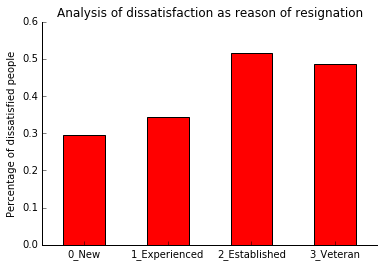

In [43]:
%matplotlib inline

graph = result.plot(kind="bar", legend=False, color="red", title="Analysis of dissatisfaction as reason of resignation")
graph.set_xlabel("x").set_visible(False)
graph.set_xticklabels(result.index, rotation = 0)
graph.set_ylabel("Percentage of dissatisfied people")
graph.tick_params(right='off',top="off")
graph.spines["right"].set_visible(False)
graph.spines["top"].set_visible(False)

## Conclusion

To conclude, it seems that the higher the length of service, the more *"dissatisfaction"* is a reason of resignation. Yet, this idea does not explain why *"Veteran"* resignations are a bit less explained by dissatisfaction than *"Established"* group of former employees.

To answer the second question *"Are younger employees resigning due to some kind of dissatisfaction? What about older employees?"*, we would do relatively the same work of cleaning and analyzing data, inverting **`"service_cat"`** with group of people made from the **`"age"`** column.
